<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Practicing K-Means:  Isotopic Composition Plutonium Batches

_Authors: Dave Yerrington (SF)_


---

We have a nice [data dictionary](https://vincentarelbundock.github.io/Rdatasets/doc/cluster/pluton.html).

    Pu238 : the percentages of (238)Pu, always less than 2 percent.

    Pu239 : the percentages of (239)Pu, typically between 60 and 80 percent (from neutron capture of Uranium, (238)U).

    Pu240 : percentage of the plutonium 240 isotope.

    Pu241 : percentage of the plutonium 241 isotope.
    
This data is fairly odd and you will see that K-Means may not be ideal in a certain respect but the takeaway is that it can do an ok job with whispy, elongated shapes.  A more ideal model would be DBSCAN or a hierachical clustering model.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [4]:
csv_file = "https://vincentarelbundock.github.io/Rdatasets/csv/cluster/pluton.csv"

df = pd.read_csv(csv_file)
df.head()

,Unnamed: 0,Pu238,Pu239,Pu240,Pu241
0,1,0.126,75.804,21.204,2.180
1,2,0.133,75.515,21.408,2.240
2,3,0.127,75.175,21.668,2.305
3,4,0.156,78.872,18.428,1.906
4,5,0.503,73.317,20.223,4.128


###  Use Pu239 and Pu240 as our features.
1. Select only columns "Pu239" and "Pu240" to use for our example.
1. Plot "Pu239" and "Pu240" for visual reference.


Text(0.5, 1.0, 'Pu239 & Pu240')

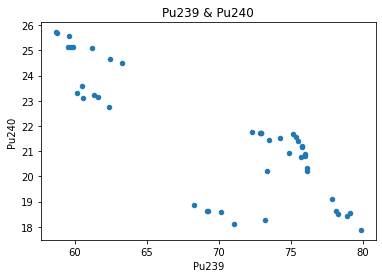

In [5]:
# A:
ax = df.plot(kind ='scatter',
             x = 'Pu239',
             y = 'Pu240')
plt.title('Pu239 & Pu240')

### Next, use K-Means to cluster this data using "Pu239" and "Pu240" features
Initialize an instance of `KMeans` from `sklearn`, initialized for K=3 clusters.  Fit our sliced dataframe with the `fit`.

In [6]:
# A:
from sklearn.cluster import KMeans
features = df[['Pu239', 'Pu240']]
X = features
km = KMeans(n_clusters= 3, random_state=42)
km.fit(X)

C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

### Assign clusters assignments (predictions) back to the original dataframe

In [8]:
# A: 
df['predictions'] = km.labels_
df.drop(columns='Unnamed: 0',inplace=True)


### Reference the coordinates for the centroids, plot with your "Pu239" and "Pu240" scatter plot
Plot the centroids from the model object with the scatter of "Pu239" and "Pu240".

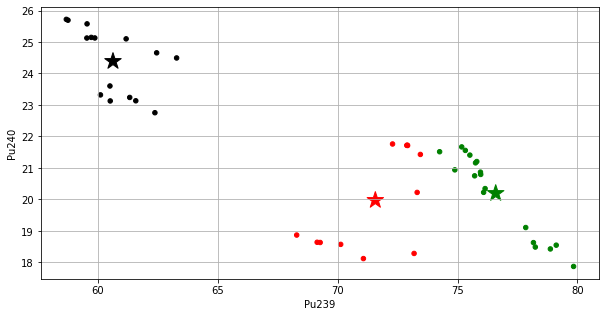

In [9]:
# A:
centroids = pd.DataFrame(km.cluster_centers_, 
                        columns = ["Pu239", "Pu240"])
colors = ["black", "red", "green"]
df['color'] = df['predictions'].map(lambda p: colors[p])
ax = df.plot(    
    kind="scatter", 
    x="Pu239", y="Pu240",
    figsize=(10,5), 
    grid=True, 
    c = df['color'])

centroids.plot(kind="scatter", 
               x="Pu239", 
               y="Pu240", 
               marker="*", 
               c=["black", "red", "green"],
               s = 300,
               grid = True,
               ax=ax);

### Scale your data, rerun your model, then plot.
This should help slightly but you should compare before and after.

In [10]:
# A:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = features
X_scaled = sc.fit_transform(X)
km_scaled = km.fit(X_scaled)


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


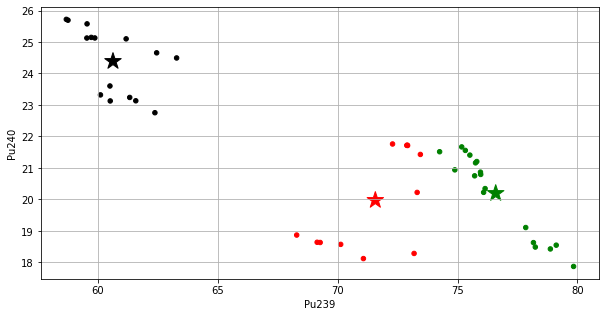

In [11]:
centroids_scaled = pd.DataFrame(km_scaled.cluster_centers_, 
                        columns = ["Pu239", "Pu240"])
colors = ["black", "red", "green"]
df['color'] = df['predictions'].map(lambda p: colors[p])
ax = df.plot(    
    kind="scatter", 
    x="Pu239", y="Pu240",
    figsize=(10,5), 
    grid=True, 
    c = df['color'])

centroids.plot(kind="scatter", 
               x="Pu239", 
               y="Pu240", 
               marker="*", 
               c=["black", "red", "green"],
               s = 300,
               grid = True,
               ax=ax);

### Might as well check that silhouette score
Just to confirm what your eyes are telling you.

In [12]:
# A: 
from sklearn.metrics import silhouette_score
silhouette_score(X_scaled, km_scaled.labels_)

0.633217477686232